In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from utils import train_test_split, standardize, polynomialFeatures
from utils import MSE_degree_plot
from model import PolynomialRegression
from utils import plot_RMSE_loglam
import datetime

In [2]:
df = pd.read_csv('FoDS-A1.csv')
# df = df.sample(frac=1, random_state=42)
df.head()

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20


In [3]:
X = df[['Strength', 'Temperature']].to_numpy()
y = df['Pressure'].to_numpy()
y = y.reshape(-1, 1)
X.shape, y.shape

((1650, 2), (1650, 1))

In [4]:
BGD_MSE_train = []
SGD_MSE_train = []
BGD_MSE_test = []
SGD_MSE_test = []
model_wts = []
model_params = []

## Degree: 0

Degree : 0
Cost after iteration 50 : 46.91717962319684
Cost after iteration 100 : 20.910611078854593
Cost after iteration 150 : 11.39136590608625
Cost after iteration 200 : 7.907014308343979
Cost after iteration 250 : 6.631628935203256
Cost after iteration 300 : 6.164796641046927
Cost after iteration 350 : 5.993920923434933
Cost after iteration 400 : 5.931374884450673
Cost after iteration 450 : 5.908481011363896
Cost after iteration 500 : 5.900101113397131
Cost after iteration 550 : 5.897033799724725
Cost after iteration 600 : 5.895911063719795
Cost after iteration 650 : 5.895500106031278
Cost after iteration 700 : 5.895349682226385
Cost after iteration 750 : 5.8952946222488976
Cost after iteration 800 : 5.895274468516427
Cost after iteration 850 : 5.895267091598546
Cost after iteration 900 : 5.8952643914080225
Cost after iteration 950 : 5.895263403050963
Cost after iteration 1000 : 5.895263041280315


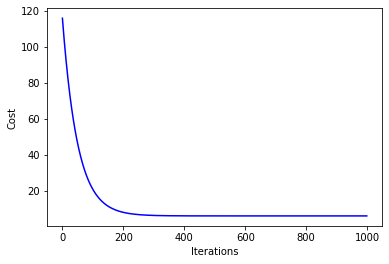

In [5]:
degree=0
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1000, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
model_params.append(np.array([pr.b]).reshape(-1, 1))

In [6]:
X_train.shape, y_train.shape

((2, 1155), (1155, 1))

In [78]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.690253477661287


Cost after epoch 1: 30.089230925903284
Cost after epoch 2: 10.27113576488721
Cost after epoch 3: 6.184106687320864
Cost after epoch 4: 5.110684114495831
Cost after epoch 5: 4.793855718023945


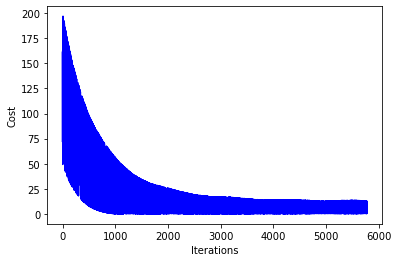

In [79]:
pr = PolynomialRegression(0, degree=0, learning_rate=0.001, epochs=5, GD='StochasticGD')
pr.train(X_train, y_train)

In [80]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.69895242105457


## Degree: 1

Degree : 1
Cost after iteration 50 : 46.04022067826685
Cost after iteration 100 : 19.483156099992264
Cost after iteration 150 : 9.518607254709714
Cost after iteration 200 : 5.6529150252103495
Cost after iteration 250 : 4.047491153629957
Cost after iteration 300 : 3.294481425440822
Cost after iteration 350 : 2.8753774739158144
Cost after iteration 400 : 2.5975073538159124
Cost after iteration 450 : 2.3878299597593653
Cost after iteration 500 : 2.2174238367815216
Cost after iteration 550 : 2.07380608264746
Cost after iteration 600 : 1.9507621733890725
Cost after iteration 650 : 1.8445900911541113
Cost after iteration 700 : 1.752696656787919
Cost after iteration 750 : 1.6730586685310642
Cost after iteration 800 : 1.6040039100355141
Cost after iteration 850 : 1.5441121237614917
Cost after iteration 900 : 1.492162396478579
Cost after iteration 950 : 1.4470997025331769
Cost after iteration 1000 : 1.4080103413686023
Cost after iteration 1050 : 1.3741022630850825
Cost after iteration 1100 : 1.

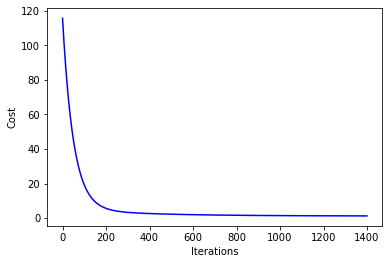

In [81]:
degree=1
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [82]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2250967294851116


Cost after epoch 1: 44.196537934505095
Cost after epoch 2: 0.18403703361861734


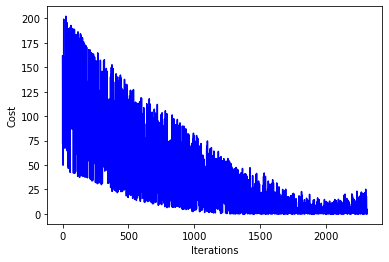

In [83]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.0005, epochs=2, GD='StochasticGD')
pr.train(X_train, y_train)

In [84]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 6.742013951466701


## Degree: 2

Degree : 2
Cost after iteration 50 : 45.44029536546442
Cost after iteration 100 : 18.62229875593276
Cost after iteration 150 : 8.500167739086335
Cost after iteration 200 : 4.5660906893985445
Cost after iteration 250 : 2.9551705715204206
Cost after iteration 300 : 2.2379544592886886
Cost after iteration 350 : 1.8801917305847835
Cost after iteration 400 : 1.6781085214309799
Cost after iteration 450 : 1.5509869019645555
Cost after iteration 500 : 1.4647104177266308
Cost after iteration 550 : 1.4033827874627172
Cost after iteration 600 : 1.3586437699892335
Cost after iteration 650 : 1.3255379604973925
Cost after iteration 700 : 1.3008382407021628
Cost after iteration 750 : 1.2823095215219416
Cost after iteration 800 : 1.2683478398091286
Cost after iteration 850 : 1.2577800944130804
Cost after iteration 900 : 1.249739916609385
Cost after iteration 950 : 1.2435843345865119
Cost after iteration 1000 : 1.2388350087903615
Cost after iteration 1050 : 1.235135648499957
Cost after iteration 1100 :

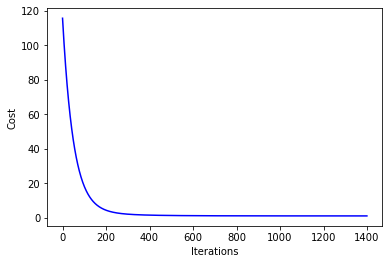

In [85]:
degree=2
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [86]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2425561719215246


Cost after epoch 1: 0.0009874128077126739


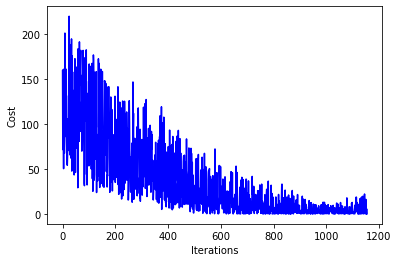

In [87]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [88]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.925627204449026


## Degree: 3

Degree : 3
Cost after iteration 50 : 44.974430220803846
Cost after iteration 100 : 18.01725953319262
Cost after iteration 150 : 7.90312059065093
Cost after iteration 200 : 4.045222415987641
Cost after iteration 250 : 2.5341017458472006
Cost after iteration 300 : 1.9173837678086059
Cost after iteration 350 : 1.6501483801153318
Cost after iteration 400 : 1.5246593569610056
Cost after iteration 450 : 1.459726836642222
Cost after iteration 500 : 1.4224254910431762
Cost after iteration 550 : 1.39870587856013
Cost after iteration 600 : 1.3821801265319915
Cost after iteration 650 : 1.3697328127625998
Cost after iteration 700 : 1.3597375692209528
Cost after iteration 750 : 1.3512943115980558
Cost after iteration 800 : 1.3438816272638274
Cost after iteration 850 : 1.3371869835052685
Cost after iteration 900 : 1.3310181070322775
Cost after iteration 950 : 1.32525407808356
Cost after iteration 1000 : 1.319817183143426
Cost after iteration 1050 : 1.314656235821679
Cost after iteration 1100 : 1.309

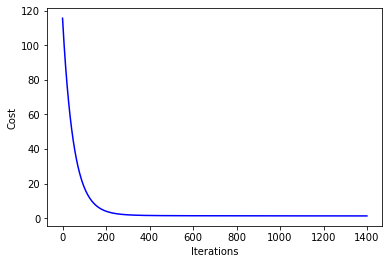

In [89]:
degree= 3
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [90]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.291511716209471


Cost after epoch 1: 0.2244443878789955


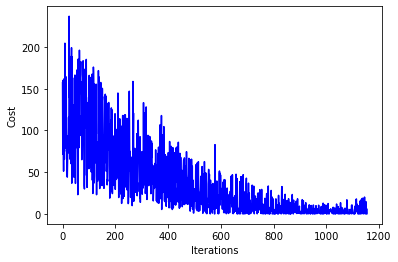

In [91]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [92]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.389498826628728


## Degree: 4

Degree : 4
Cost after iteration 50 : 44.59795328686979
Cost after iteration 100 : 17.639225637138043
Cost after iteration 150 : 7.6294399733130875
Cost after iteration 200 : 3.883969687057602
Cost after iteration 250 : 2.462309217314743
Cost after iteration 300 : 1.9074256137372887
Cost after iteration 350 : 1.6786704800540864
Cost after iteration 400 : 1.5744533963200222
Cost after iteration 450 : 1.5190875005728333
Cost after iteration 500 : 1.483863709889148
Cost after iteration 550 : 1.4577150926148739
Cost after iteration 600 : 1.4362585878276055
Cost after iteration 650 : 1.4176746982488548
Cost after iteration 700 : 1.40114497396481
Cost after iteration 750 : 1.3862528137466947
Cost after iteration 800 : 1.3727502615454072
Cost after iteration 850 : 1.3604654085586434
Cost after iteration 900 : 1.3492645715051454
Cost after iteration 950 : 1.3390361868116738
Cost after iteration 1000 : 1.3296835062699053
Cost after iteration 1050 : 1.3211209632825045
Cost after iteration 1100 : 

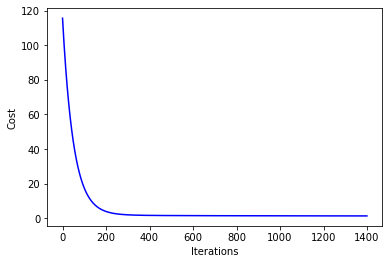

In [93]:
degree= 4
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [94]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2782515284756562


Cost after epoch 1: 0.7632857871359149


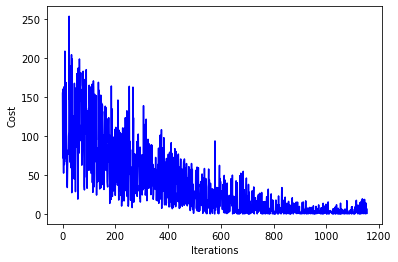

In [95]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [96]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 5.099734524346724


## Degree: 5

Degree : 5
Cost after iteration 50 : 44.31772140251893
Cost after iteration 100 : 17.45102395108921
Cost after iteration 150 : 7.554017414556035
Cost after iteration 200 : 3.8775181650050743
Cost after iteration 250 : 2.48630717921775
Cost after iteration 300 : 1.938835898459323
Cost after iteration 350 : 1.7063091173892393
Cost after iteration 400 : 1.594153633685779
Cost after iteration 450 : 1.53028344169796
Cost after iteration 500 : 1.4875888481998765
Cost after iteration 550 : 1.4555463297062747
Cost after iteration 600 : 1.4298074152061895
Cost after iteration 650 : 1.4083704273259152
Cost after iteration 700 : 1.3901643043040512
Cost after iteration 750 : 1.3745177532447597
Cost after iteration 800 : 1.3609545891384178
Cost after iteration 850 : 1.3491102644747428
Cost after iteration 900 : 1.3386942546162757
Cost after iteration 950 : 1.3294704665598127
Cost after iteration 1000 : 1.3212452677407582
Cost after iteration 1050 : 1.3138591477494088
Cost after iteration 1100 : 1.3

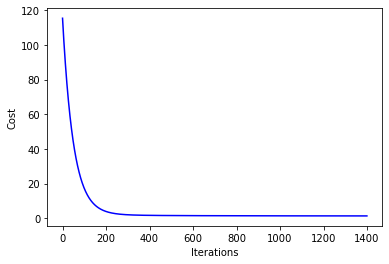

In [97]:
degree= 5
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [98]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2740963043080673


Cost after epoch 1: 0.01961666398096578


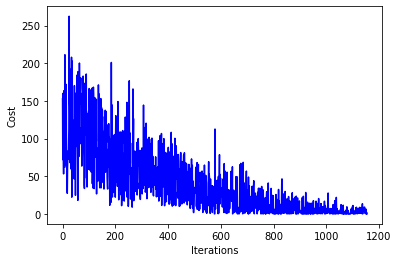

In [99]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.0009, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [100]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 2.6709603208221417


## Degree: 6

Degree : 6
Cost after iteration 50 : 44.13246617654007
Cost after iteration 100 : 17.382150671359195
Cost after iteration 150 : 7.547681430883793
Cost after iteration 200 : 3.884849553758665
Cost after iteration 250 : 2.4887127929432835
Cost after iteration 300 : 1.933344885405102
Cost after iteration 350 : 1.6952309576464446
Cost after iteration 400 : 1.5806065529060296
Cost after iteration 450 : 1.5167390438119412
Cost after iteration 500 : 1.475619992855572
Cost after iteration 550 : 1.4459643447083315
Cost after iteration 600 : 1.4228774692658464
Cost after iteration 650 : 1.404003729392195
Cost after iteration 700 : 1.388064095983215
Cost after iteration 750 : 1.3742818298119732
Cost after iteration 800 : 1.3621435352731872
Cost after iteration 850 : 1.3512906109935257
Cost after iteration 900 : 1.3414640494918029
Cost after iteration 950 : 1.332472888058765
Cost after iteration 1000 : 1.3241743405257878
Cost after iteration 1050 : 1.3164604213286302
Cost after iteration 1100 : 1.

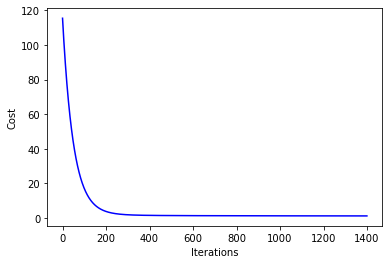

In [101]:
degree= 6
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [102]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2662532183642807


Cost after epoch 1: 1.8796756319328611


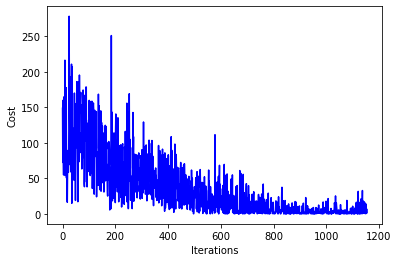

In [103]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [104]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.94895595009239


## Degree: 7

Degree : 7
Cost after iteration 50 : 44.02484524584798
Cost after iteration 100 : 17.360024532551883
Cost after iteration 150 : 7.53917081584531
Cost after iteration 200 : 3.8711169595666086
Cost after iteration 250 : 2.4722671478202938
Cost after iteration 300 : 1.9187701387903053
Cost after iteration 350 : 1.6849443395589305
Cost after iteration 400 : 1.5750560259866992
Cost after iteration 450 : 1.5152646758270853
Cost after iteration 500 : 1.4771135551250028
Cost after iteration 550 : 1.4492549047148942
Cost after iteration 600 : 1.4269223270023603
Cost after iteration 650 : 1.407962981390152
Cost after iteration 700 : 1.3913122247557466
Cost after iteration 750 : 1.3763886935959946
Cost after iteration 800 : 1.3628431403570553
Cost after iteration 850 : 1.350447483965687
Cost after iteration 900 : 1.3390420182871348
Cost after iteration 950 : 1.3285082642903474
Cost after iteration 1000 : 1.3187539864115332
Cost after iteration 1050 : 1.3097044342708408
Cost after iteration 1100 :

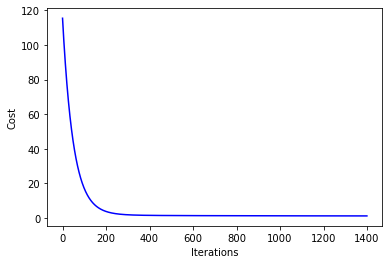

In [105]:
degree= 7
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [106]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.249511976888841


Cost after epoch 1: 2.066490157183527


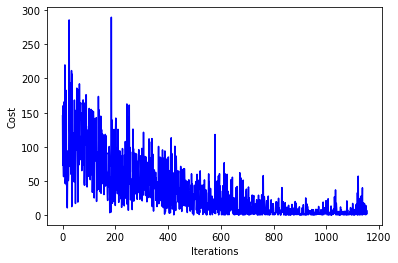

In [107]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [108]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.854528170435386


## Degree: 8

Degree : 8
Cost after iteration 50 : 43.9676470330842
Cost after iteration 100 : 17.342222960642182
Cost after iteration 150 : 7.519412687412444
Cost after iteration 200 : 3.8539220496443463
Cost after iteration 250 : 2.4621189850628062
Cost after iteration 300 : 1.9155307267154522
Cost after iteration 350 : 1.6864270947100617
Cost after iteration 400 : 1.578832503658806
Cost after iteration 450 : 1.5193922983590749
Cost after iteration 500 : 1.480292536678716
Cost after iteration 550 : 1.4507538058725886
Cost after iteration 600 : 1.4264376816292892
Cost after iteration 650 : 1.4054820782211839
Cost after iteration 700 : 1.3870021801740446
Cost after iteration 750 : 1.370515131573824
Cost after iteration 800 : 1.355714429155308
Cost after iteration 850 : 1.3423786469026808
Cost after iteration 900 : 1.3303328134949872
Cost after iteration 950 : 1.3194310007122072
Cost after iteration 1000 : 1.3095477729746532
Cost after iteration 1050 : 1.300573517572576
Cost after iteration 1100 : 1.

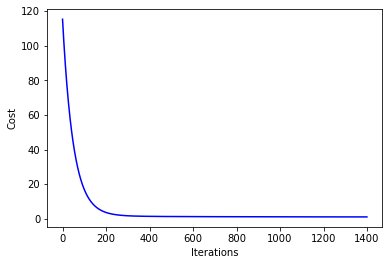

In [109]:
degree= 8
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.01, epochs=1400, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [110]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 1.2401076479317754


Cost after epoch 1: 2.013524736343837


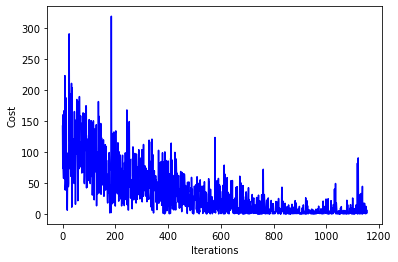

In [111]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [112]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.707359184906692


## Degree: 9

Degree : 9
Cost after iteration 50 : 106.2764263296914
Cost after iteration 100 : 96.1822592431095
Cost after iteration 150 : 87.104903417819
Cost after iteration 200 : 78.928846651414
Cost after iteration 250 : 71.55679119303232
Cost after iteration 300 : 64.9040760334088
Cost after iteration 350 : 58.89648472782828
Cost after iteration 400 : 53.46855890551395
Cost after iteration 450 : 48.56227272196183
Cost after iteration 500 : 44.125975871586206
Cost after iteration 550 : 40.11353841591767
Cost after iteration 600 : 36.48364894421621
Cost after iteration 650 : 33.199230663068285
Cost after iteration 700 : 30.22694939867533
Cost after iteration 750 : 27.5367942492902
Cost after iteration 800 : 25.101716499340622
Cost after iteration 850 : 22.897315937729886
Cost after iteration 900 : 20.90156629267882
Cost after iteration 950 : 19.094573376462318
Cost after iteration 1000 : 17.458360919525777
Cost after iteration 1050 : 15.976680103166707
Cost after iteration 1100 : 14.634839572067

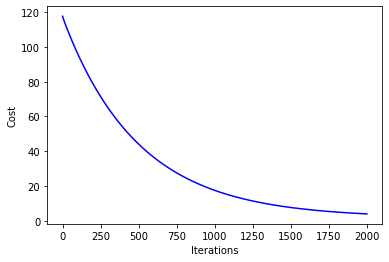

In [113]:
degree=9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2000, GD='BatchGD')
pr.train(X_train, y_train)
model_wts.append(pr.W)
W = np.append(np.array([pr.b]).reshape(-1, 1), pr.W).reshape(-1, 1)
model_params.append(W)

In [114]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

BGD_MSE_train.append(pr.costs[-1])
BGD_MSE_test.append(test_mse)

Error on testing data, MSE : 3.8279887255957594


Cost after epoch 1: 1.8467599026508037


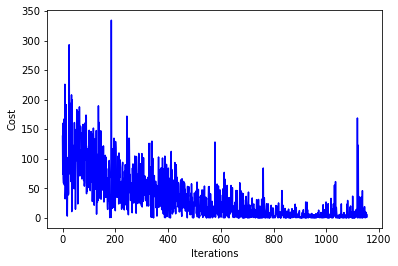

In [115]:
pr = PolynomialRegression(X_train.shape[0], degree=degree, learning_rate=0.001, epochs=1, GD='StochasticGD')
pr.train(X_train, y_train)

In [116]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data, MSE : {test_mse}")

SGD_MSE_train.append(pr.costs[-1])
SGD_MSE_test.append(test_mse)

Error on testing data, MSE : 4.6571968416370035


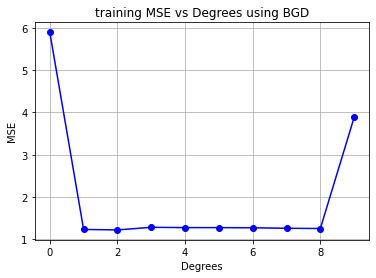

In [117]:
MSE_degree_plot(BGD_MSE_train, 'training', 'BGD')

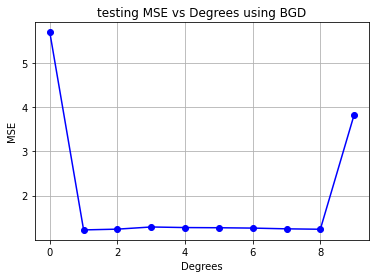

In [118]:
MSE_degree_plot(BGD_MSE_test, 'testing', 'BGD')

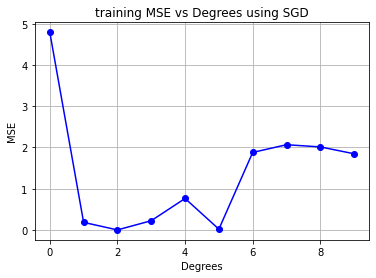

In [119]:
MSE_degree_plot(SGD_MSE_train, 'training', 'SGD')

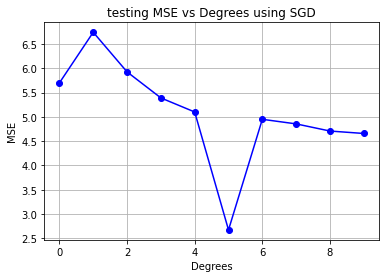

In [120]:
MSE_degree_plot(SGD_MSE_test, 'testing', 'SGD')

# Regularization

# L1 : Lasso Regularization

Degree : 9
Cost after iteration 50 : 107.14562145151011
Cost after iteration 100 : 97.45985411539625
Cost after iteration 150 : 88.70554291795503
Cost after iteration 200 : 80.7888480134129
Cost after iteration 250 : 73.62711953840856
Cost after iteration 300 : 67.14854613299407
Cost after iteration 350 : 61.28699224791798
Cost after iteration 400 : 55.98567296081053
Cost after iteration 450 : 51.18659377233481
Cost after iteration 500 : 46.84600573492976
Cost after iteration 550 : 42.918746717882314
Cost after iteration 600 : 39.36530364523777
Cost after iteration 650 : 36.148573327524666
Cost after iteration 700 : 33.241892838837074
Cost after iteration 750 : 30.610688803708165
Cost after iteration 800 : 28.22888372293394
Cost after iteration 850 : 26.07597393722581
Cost after iteration 900 : 24.128622260207102
Cost after iteration 950 : 22.363981374634953
Cost after iteration 1000 : 20.770132624032147
Cost after iteration 1050 : 19.325971819734637
Cost after iteration 1100 : 18.0196

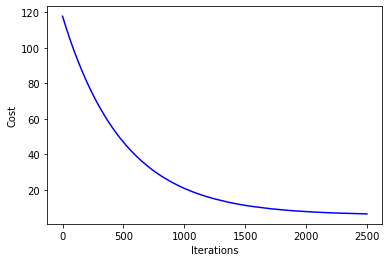

In [121]:
degree = 9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2500, GD='BatchGD', regularizer='L1', gamma=0.8)
pr.train(X_train, y_train)

In [122]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data : {test_mse}")

Error on testing data : 6.268719408077034


Cost after epoch 1: 40.833757978984366
Cost after epoch 2: 1.4785932015959928


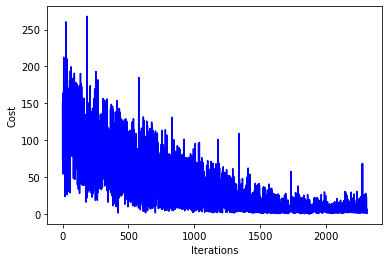

In [123]:
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.0005, epochs=2, GD='StochasticGD', regularizer='L1', gamma=0.8)
pr.train(X_train, y_train)

In [124]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 8.32081617765393


## L2 : Ridge Regression

Degree : 9
Cost after iteration 50 : 106.3077717228611
Cost after iteration 100 : 96.26822971172277
Cost after iteration 150 : 87.25930858948817
Cost after iteration 200 : 79.15659957149744
Cost after iteration 250 : 71.85798125988906
Cost after iteration 300 : 65.27643566325898
Cost after iteration 350 : 59.33674421809277
Cost after iteration 400 : 53.97315612731618
Cost after iteration 450 : 49.127698574338496
Cost after iteration 500 : 44.74892104685876
Cost after iteration 550 : 40.79093714910383
Cost after iteration 600 : 37.21267361640848
Cost after iteration 650 : 33.9772664984834
Cost after iteration 700 : 31.051564268302002
Cost after iteration 750 : 28.405710594466765
Cost after iteration 800 : 26.012788059793788
Cost after iteration 850 : 23.84850976072506
Cost after iteration 900 : 21.890949484485002
Cost after iteration 950 : 20.1203036864986
Cost after iteration 1000 : 18.51868020451132
Cost after iteration 1050 : 17.069909825050605
Cost after iteration 1100 : 15.75937764

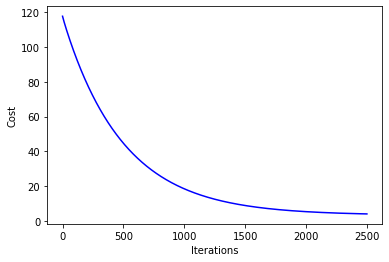

In [125]:
degree = 9
X_new = polynomialFeatures(X, degree=degree)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 42)
X_train, X_test = standardize(X_train, X_test) 

print(f"Degree : {degree}")
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.001, epochs=2500, GD='BatchGD', regularizer='L2', gamma=0.9)
pr.train(X_train, y_train)

In [126]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 3.9776006154887904


Cost after epoch 1: 27.92393709105224
Cost after epoch 2: 1.6490279450544245


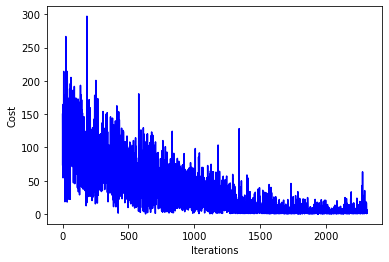

In [127]:
pr = PolynomialRegression(X_train.shape[0], learning_rate=0.0005, epochs=2, GD='StochasticGD', regularizer='L2', gamma=0.89)
pr.train(X_train, y_train)

In [128]:
test_mse = pr.evaluate(X_test, y_test)
print(f"Error on testing data: {test_mse}")

Error on testing data: 5.978692693133603


# RMS vs log lambda

## L1 

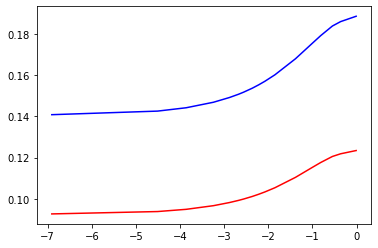

In [129]:
plot_RMSE_loglam(X, y, degree_=9, learning_rate=0.001, epochs=1800, regularizer='L1')

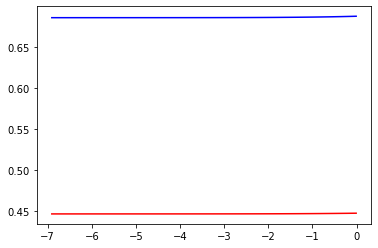

In [130]:
plot_RMSE_loglam(X, y, degree_=9, learning_rate=0.005, epochs=2, GD='StochasticGD', regularizer='L1')

## L2

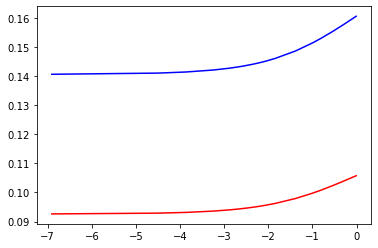

In [131]:
plot_RMSE_loglam(X, y, degree_=9, learning_rate=0.001, epochs=1800, regularizer='L2')

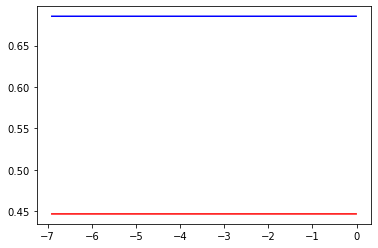

In [132]:
plot_RMSE_loglam(X, y, degree_=9, learning_rate=0.005, epochs=2, GD='StochasticGD', regularizer='L2')

In [133]:
X = df[['Strength', 'Temperature']]
y = df['Pressure'].to_numpy()
y = y.reshape(-1, 1)
X.shape, y.shape

((1650, 2), (1650, 1))

In [134]:
X = df[['Strength', 'Temperature']]

# Surface plots

In [135]:
def split_df(df):
    df = df.sample(frac=1)
    train_size = int(0.70 * len(df))
    test_size = int(0.30 * len(df))
    
    train_data = df[:train_size]
    test_data = df[-test_size:]
    
    return train_data, test_data

In [136]:
train_data, test_data = split_df(df)

In [137]:
train_data['Strength'] = (train_data['Strength'] - train_data['Strength'].mean())/(train_data['Strength'].std())
train_data['Temperature'] = (train_data['Temperature'] - train_data['Temperature'].mean())/(train_data['Temperature'].std())

In [138]:
x1 = train_data['Strength'].to_numpy()
x2 = train_data['Temperature'].to_numpy()

In [139]:
def surface_plot(train, x1, x2, deg, wt):
    X_train = train.iloc[:, 0:len(train.columns)-1]
    Y_train = train.iloc[:, -1:]
    X_tr = X_train.to_numpy()
    Y_tr = Y_train.to_numpy()
    
    z = X_tr.dot(wt.T)
    
    fig = plt.figure()
    fig.set_size_inches(10, 10)

    my_map = plt.get_cmap('hot')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('Degree of polynomial {}'.format(deg), fontsize = 10, color = 'Blue')
    ax.set_xlabel('Strength', color='red', fontsize = 10,y = 5)
    ax.set_ylabel('Temperature', color='Green', fontsize = 10,y = 0)
    ax.set_zlabel('Pressure', color='Purple', fontsize = 10, y = 0)
    
    trisurf = ax.plot_trisurf(x1.flatten(), x2.flatten(), z.flatten(), cmap = my_map, linewidth = 0.2,
                              antialiased = True, edgecolor = 'grey')
    ax.scatter(x1[:70].flatten(), x2[:70].flatten(), Y_tr[:70].flatten(), zdir = 'z', s = 10, c = None, depthshade = True, 
               cmap = my_map)
    plt.show()

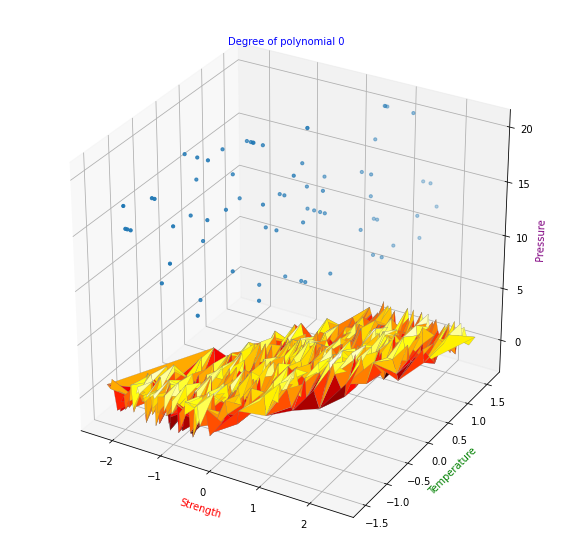

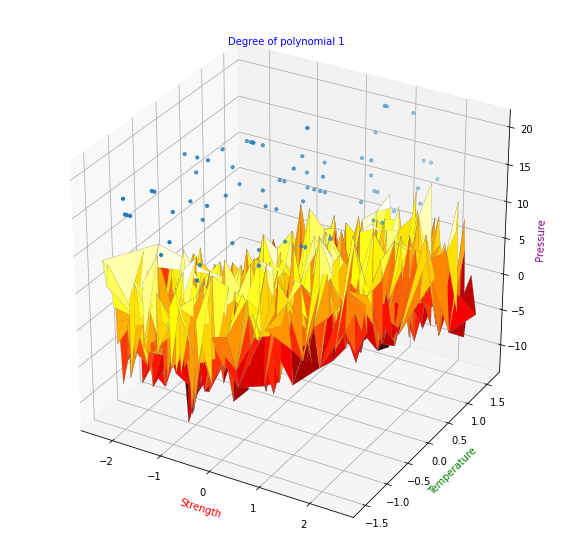

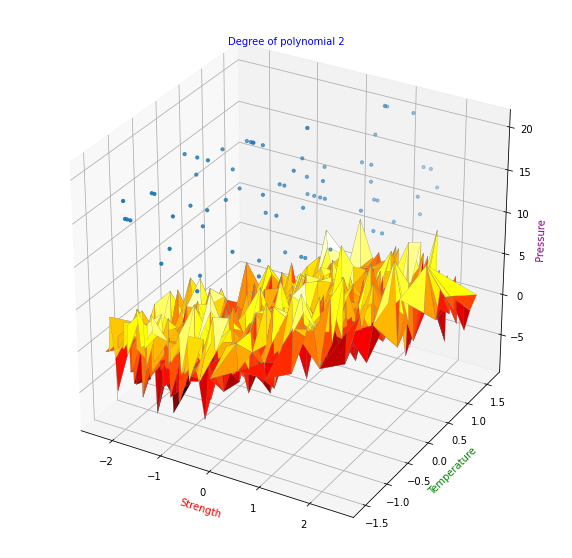

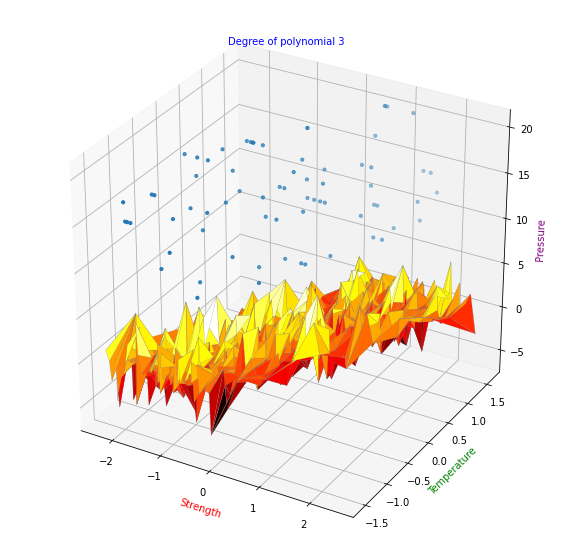

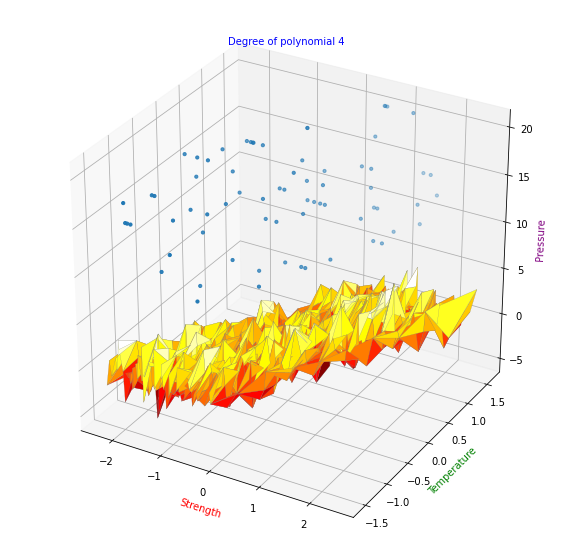

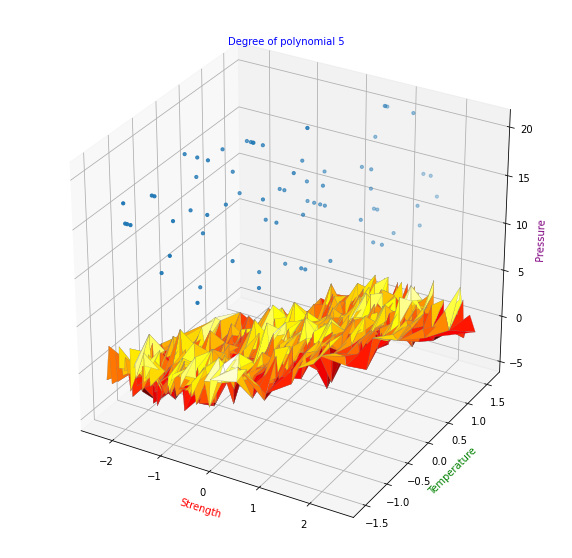

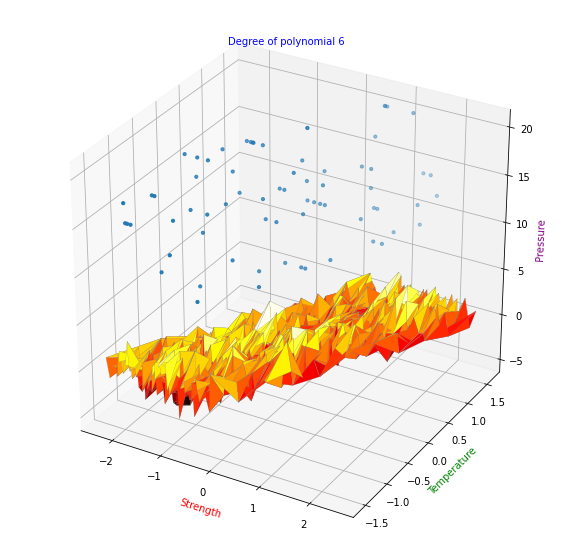

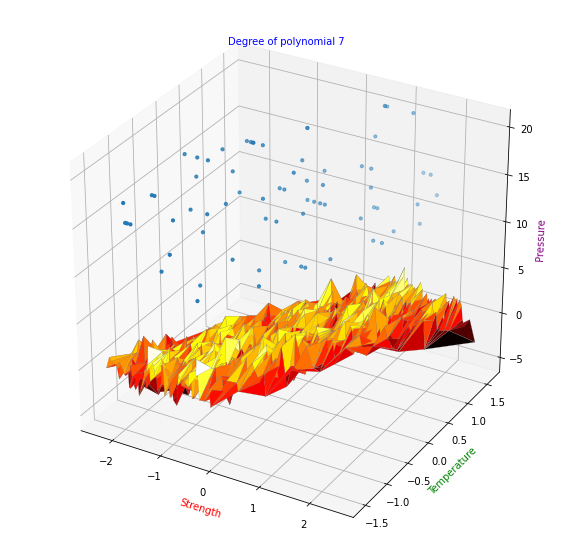

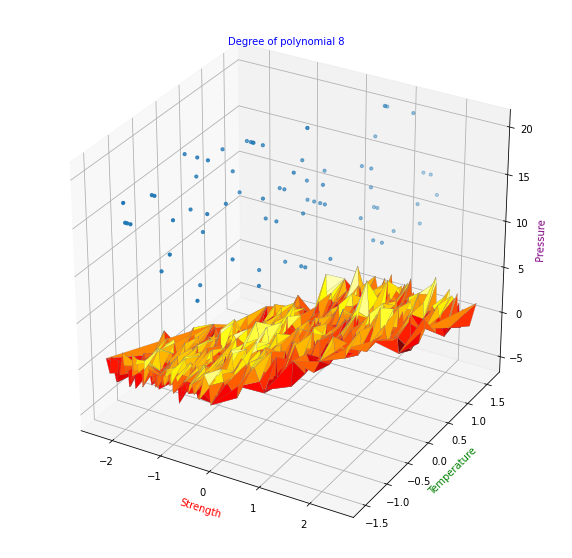

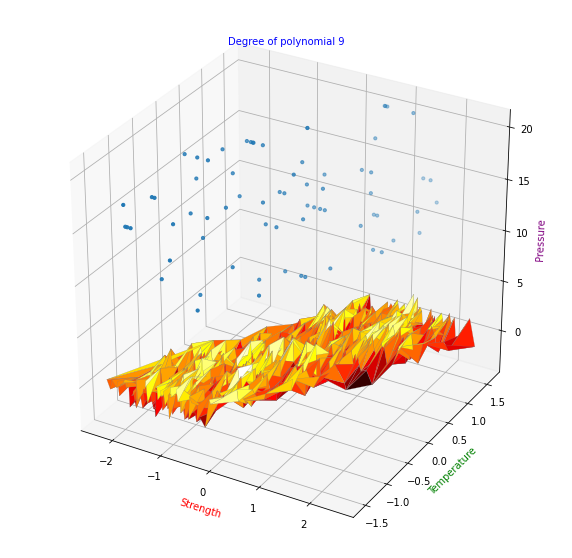

In [140]:
for i in range(0, 10):
    w = np.array(model_wts[i])
    b = np.ones(model_wts[i].shape)
    b = b.reshape(-1, 1)
    wt = np.column_stack((w, b))
    surface_plot(train_data, x1, x2, i, wt)

In [141]:
def surface_function(X, y, W, degree):
    Z = np.zeros((100, 100))
    for j in range(100):
            for k in range(100):
                dim = 0
                _X = np.zeros(((degree + 1) * (degree + 2) // 2))
                for j1 in range(degree + 1):
                    for k1 in range(j1 + 1):
                        _X[dim] = np.multiply(np.power(X[j, k], k1).T, np.power(y[j, k], j1 - k1).T)
                        dim += 1
                Z[j, k] = W.T @ _X.reshape(-1, 1)
    return Z

In [142]:
def surface_plot(W):
    fig = plt.figure(figsize=(20, 40))
    fig.tight_layout(pad=5.0)
    
    for degree in range(len(W)):
        x1 = np.linspace(-1, 1, 100)
        x2 = np.linspace(-1, 1, 100)
        X, y = np.meshgrid(x1, x2)
        axes = fig.add_subplot(6, 2, degree + 1, projection='3d')
        axes.view_init(-160, 60)
                
        Z = surface_function(X, y, W[degree], degree)        
        axes.plot_surface(X, y, Z)
        axes.set_xlabel('standardize strength', fontsize = 10)
        axes.set_ylabel('standardized temperature', fontsize = 10)
        axes.set_zlabel('Pressure')
        axes.set_title(f"Degree {degree} plot")
        
        # plt.savefig('fig{}.png'.format(i), format="PNG", dpi = 300) 
        
    plt.tight_layout()
    plt.show()

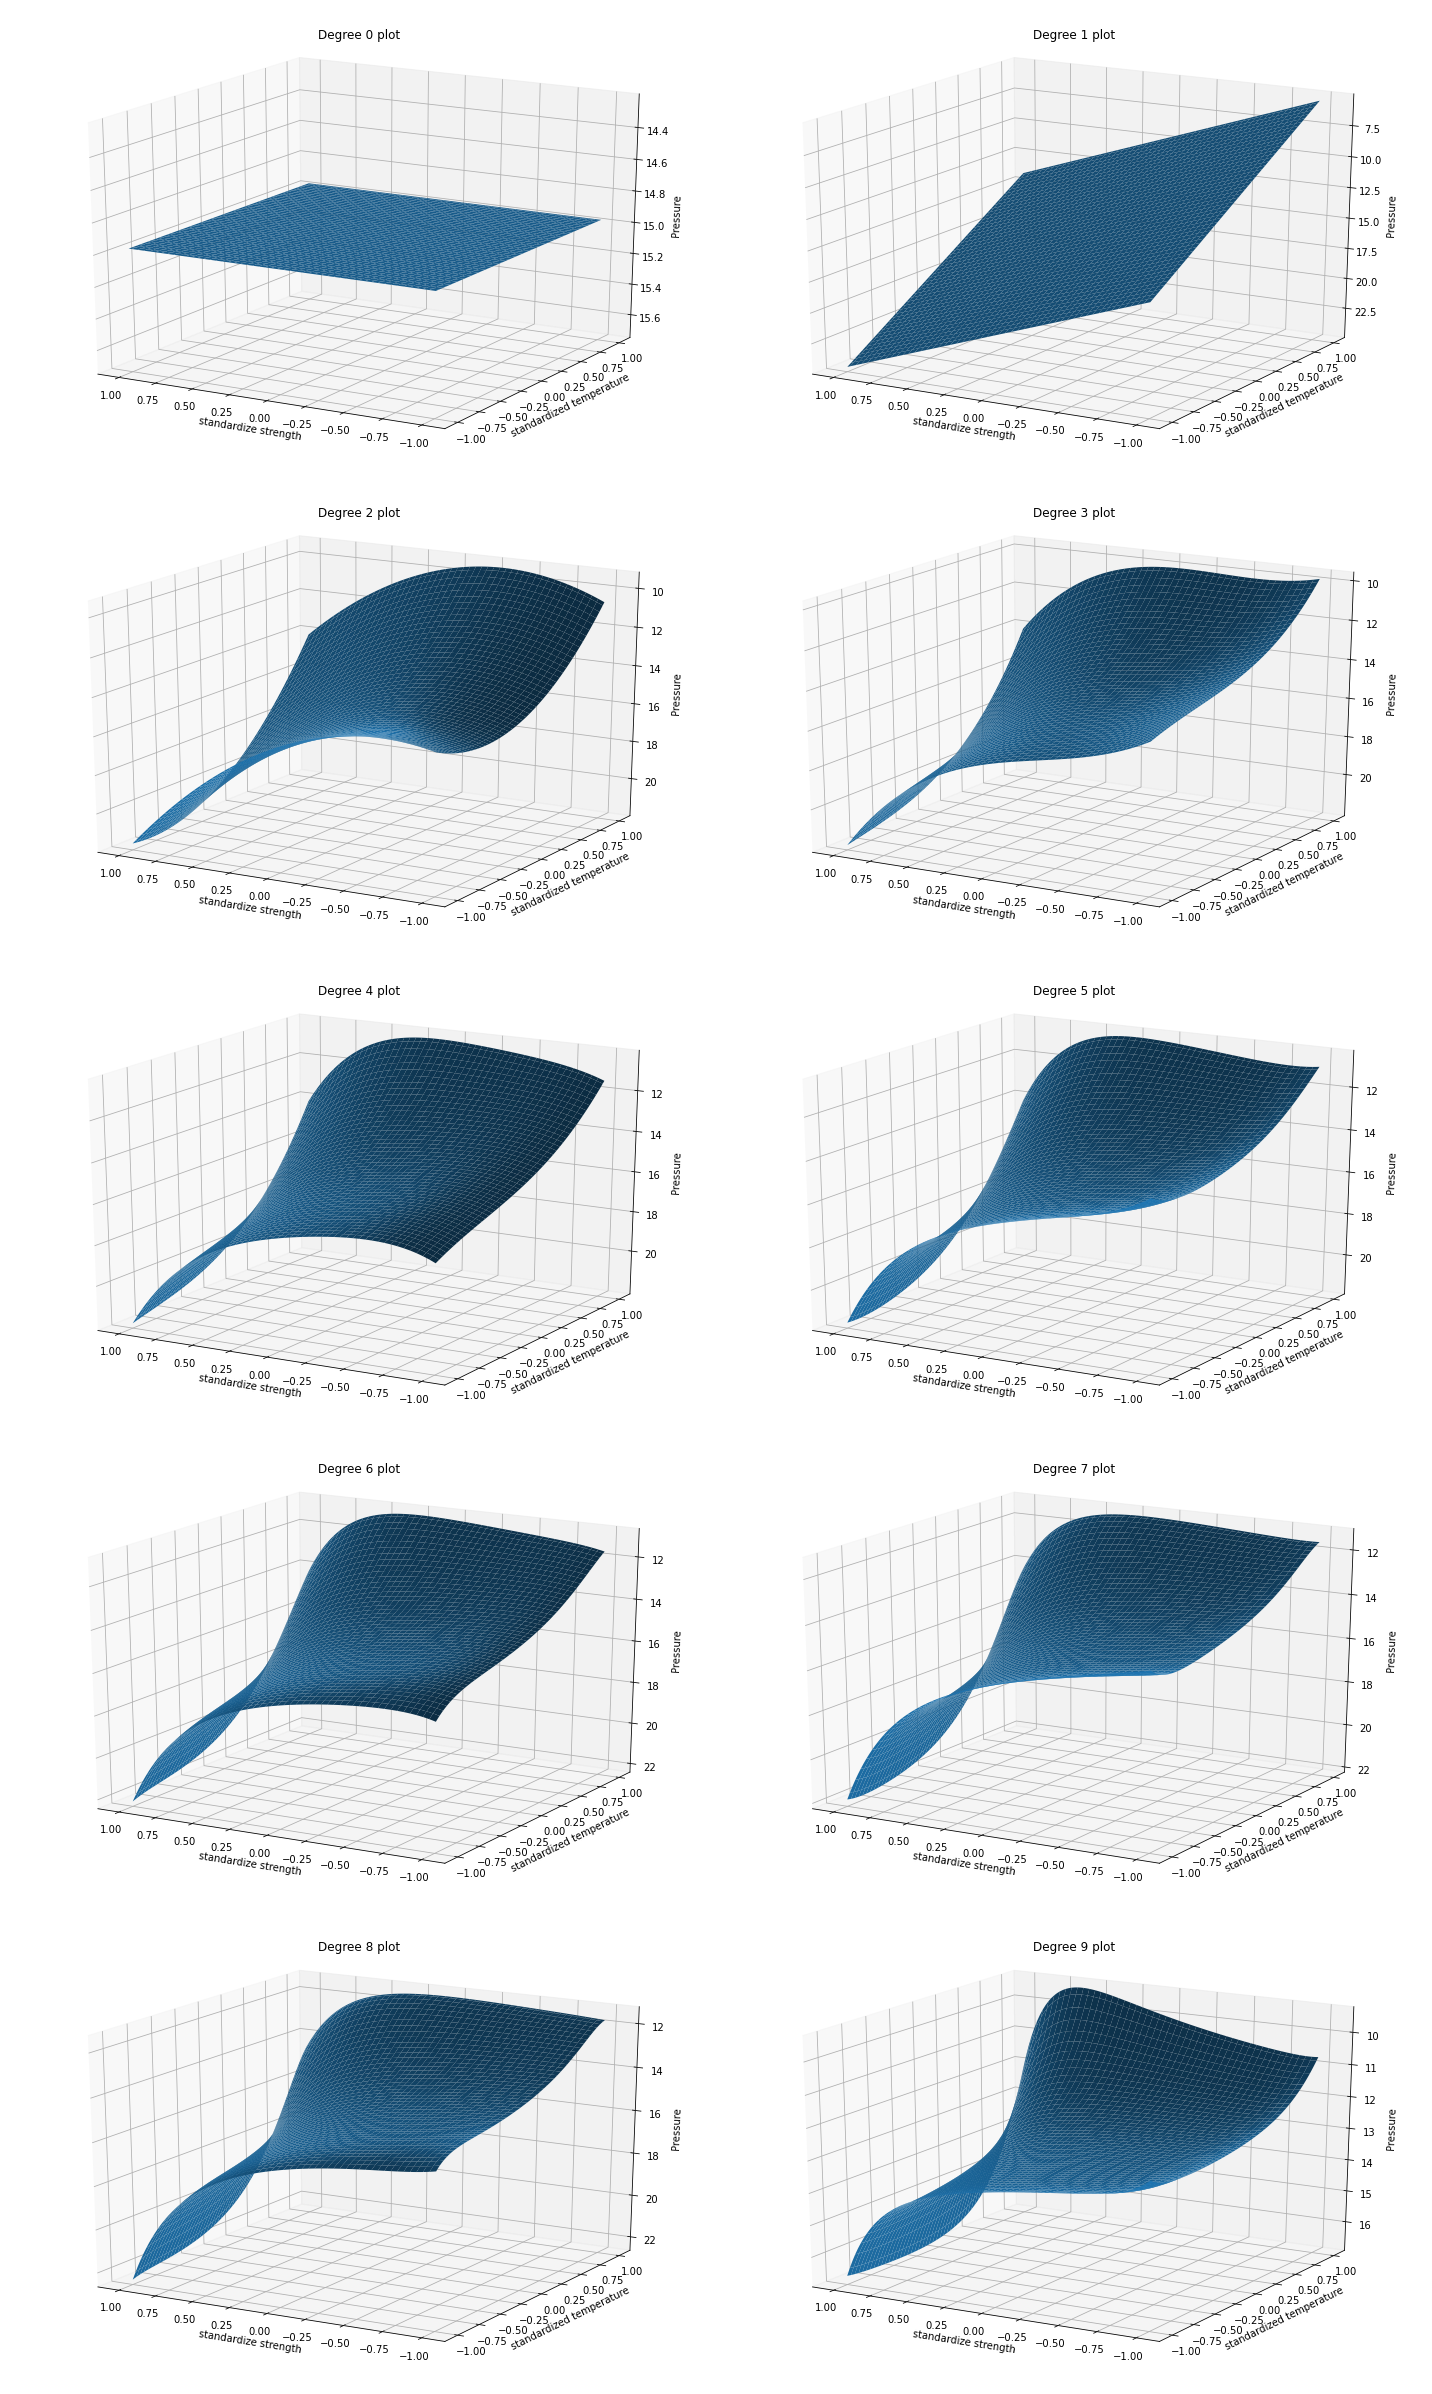

In [143]:
surface_plot(model_params)